# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 15.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=ab3dece8441575c9900a99bba5cbfa366a6a7f60cd8487483fd32fdee3da7651
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import zipfile
import numpy as np

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

For this project, I will analyze the relationship between movie attributes such as vote count, release date, and language with their popularity and audience reception. The datasets I will be wrangling include movie details from a collection of 4,803 movies, which contain information like titles, vote counts, release dates, and overviews. By exploring these relationships, I aim to identify trends and factors that contribute to the success of a movie in terms of audience engagement and ratings.
#### Questions
1. How does the vote count (vote_count) correlate with the popularity of a movie, and does it influence the movie's overall reception (e.g., its overview or audience engagement)?
2. Does the release date of a movie (release_date) have an impact on the number of votes or the quality of the overview, and are there seasonal patterns in audience engagement?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1: TMDB 5000 Movie Dataset**

Type: CSV File

Method: Download data manually

Dataset variables:
- budget: The production budget of the movie (typically in USD), representing how much was spent on making the movie.
- genres: The genres of the movie, which could be a list of categories such as "Action", "Horror", "Romance", etc.
- homepage: The official website of the movie (if available), which might include marketing materials or additional information about the film.
- id: A unique identifier for the movie in the database, used to distinguish this movie from others.
- keywords: A list of keywords related to the movie, which might include thematic elements or important motifs such as "love", "superhero", etc.
- original_language: The original language in which the movie was produced (e.g., "English", "Spanish").
- original_title: The original title of the movie, which might differ from the title under which the movie was released in other countries.
- overview: A brief summary or description of the movie’s plot.
- popularity: A numeric score indicating the popularity of the movie, typically based on factors such as views, searches, and audience engagement.
- production_companies: The companies responsible for producing the movie, such as large studios like Disney or independent production companies.
- production_countries: The countries where the movie was produced. A film can be produced in one or more countries.
- release_date: The date the movie was released, which might vary depending on the country.
- revenue: The total revenue generated by the movie, usually from global box office earnings. This figure is important for assessing the commercial success of the film.
- runtime: The duration of the movie in minutes. This could refer to the theatrical release or special editions (e.g., extended cut).
- spoken_languages: The languages spoken in the movie, such as "English", "French", etc.
- status: The current status of the movie, such as "Released", "Post-production", "Completed", etc.
- tagline: A short slogan or tagline associated with the movie, often used in marketing campaigns.
- title: The official title of the movie (the name under which it is commonly known or released).
- vote_average: The average rating given to the movie, typically based on audience or critic scores, often on a scale from 0 to 10.

In [13]:
data = pd.read_csv('datasets/movies/tmdb_5000_movies.csv')
print("First few rows of the movie dataset:")
display(data.head())


First few rows of the movie dataset:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Dataset 2: Full TMDB Movies Dataset 2024 (1M Movies)

Type: CSV File

Method: Programmatically downloading files

Dataset variables:
- id: A unique identifier for each movie in the dataset.
- title: The title of the movie.
- vote_average: The average vote rating for the movie (scale typically from 0 to 10).
- vote_count: The total number of votes the movie has received.
- status: The current status of the movie (e.g., "Released", "Post-production").
- release_date: The official release date of the movie, in datetime format.
- revenue: The total revenue generated by the movie in dollars.
- runtime: The length of the movie in minutes.
- adult: A boolean indicating whether the movie is intended for adult audiences (true/false).
- backdrop_path: A URL path to the backdrop image of the movie (often used for promotional images).
- budget: The production budget of the movie.
- homepage: The official homepage URL of the movie, if available.
- imdb_id: The IMDb identifier of the movie (an external identifier for cross-referencing).
- original_language: The original language of the movie (e.g., English, Spanish).
- original_title: The original title of the movie (may differ from the title used in some markets).
- overview: A brief description or summary of the movie.
- popularity: A measure of how popular the movie is (often based on online discussions, views, or social media mentions).
- poster_path: A URL path to the movie’s poster image.
- tagline: A short, catchy phrase associated with the movie (often used in marketing).
- genres: A list of movie genres (e.g., Action, Comedy, Drama).
- production_companies: A list of companies that produced the movie.
- production_countries: A list of countries where the movie was produced.
- spoken_languages: A list of languages spoken in the movie.

In [79]:
# URL of the dataset
url = 'https://www.kaggle.com/api/v1/datasets/download/asaniczka/tmdb-movies-dataset-2023-930k-movies'

# Define the local data store directory where raw data will be stored
data_store_dir = os.path.join(os.getcwd(), 'datasets')

# Create the directory if it does not exist
if not os.path.exists(data_store_dir):
    os.makedirs(data_store_dir)

# Define the file name
file_name = 'archive.zip'

# Define the path where the dataset will be saved
save_path = os.path.join(data_store_dir, file_name)

# Send GET request to download the file
response = requests.get(url)

# Write the content to the local file
with open(save_path, 'wb') as f:
    f.write(response.content)

# Unzip the downloaded file
with zipfile.ZipFile(save_path, 'r') as zip_ref:
    # Extract all files into the same directory
    zip_ref.extractall(data_store_dir)

    # List the names of the files inside the zip
    print(f"Files in the archive '{file_name}':")
    for file in zip_ref.namelist():
        print(file)

# Print the path and file name where the dataset is saved
print(f"Dataset downloaded and unzipped successfully.")
print(f"File Name: {file_name}")
print(f"Saved to: {save_path}")
print("First few rows of the dataset:")
data_2 = pd.read_csv('datasets/TMDB_movie_dataset_v11.csv')
display(data_2.head())


Files in the archive 'archive.zip':
TMDB_movie_dataset_v11.csv
Dataset downloaded and unzipped successfully.
File Name: archive.zip
Saved to: /workspace/datasets/archive.zip
First few rows of the dataset:


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Missing Values

In [82]:
# Inspecting the dataframe programmatically
data.isnull().sum() 

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### Issue
Some columns in the dataset have missing values, particularly homepage, overview, release_date, runtime, and tagline. This can cause issues during analysis and reduce the quality of the dataset.
#### Justification
- Columns like homepage and tagline enrich the movie profiles, but their absence does not severely impact analysis.
- Columns such as release_date, runtime, and overview are important for time-based analysis, movie duration analysis, and content analysis. Missing values in these columns can affect the accuracy of the analysis results.


In [81]:
# Inspecting the dataframe programmatically
data_2.isnull().sum() 

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             183822
revenue                       0
runtime                       0
adult                         0
backdrop_path            828956
budget                        0
homepage                1009490
imdb_id                  528448
original_language             0
original_title               13
overview                 227935
popularity                    0
poster_path              354560
tagline                  970811
genres                   451379
production_companies     618931
production_countries     499070
spoken_languages         480255
keywords                 822345
dtype: int64

#### Issue
Several important columns have significant missing values, especially release_date, backdrop_path, homepage, genres, and keywords. This can affect data quality and analysis accuracy.
#### Justification
- Consistency & Completeness: The missing values could introduce bias and reduce the completeness of your analysis. For example, missing release_date data will prevent accurate time-based analyses.

- Data Quality: If certain columns are crucial to the analysis (e.g., title, vote_average, genres), it is important to deal with missing values appropriately to ensure the integrity of the analysis.







### Quality Issue 2: Inconsistent Data Types:

In [83]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### Issue: 
The release_date is stored as an object (likely string), but it represents a date.
#### Justification: 
Storing this column as datetime instead of object will enable proper date manipulations, like extracting year, month, and day. It allows for time-based filtering and operations (e.g., grouping by year or comparing dates) to be executed efficiently.

In [84]:
data_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129227 entries, 0 to 1129226
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1129227 non-null  int64  
 1   title                 1129214 non-null  object 
 2   vote_average          1129227 non-null  float64
 3   vote_count            1129227 non-null  int64  
 4   status                1129227 non-null  object 
 5   release_date          945405 non-null   object 
 6   revenue               1129227 non-null  int64  
 7   runtime               1129227 non-null  int64  
 8   adult                 1129227 non-null  bool   
 9   backdrop_path         300271 non-null   object 
 10  budget                1129227 non-null  int64  
 11  homepage              119737 non-null   object 
 12  imdb_id               600779 non-null   object 
 13  original_language     1129227 non-null  object 
 14  original_title        1129214 non-

#### Issue: 
The release_date is stored as an object (likely string), but it represents a date.
#### Justification: 
Storing this column as datetime instead of object will enable proper date manipulations, like extracting year, month, and day. It allows for time-based filtering and operations (e.g., grouping by year or comparing dates) to be executed efficiently.

### Tidiness Issue 1: Non-Normalized Data

In [91]:
# Programmatic Inspection of the Dataframe
# Check a few sample rows to see if columns contain lists or comma-separated values
display(data_2['genres'].head())  
display(data_2['production_companies'].head())  
display(data_2['production_countries'].head()) 
display(data_2['spoken_languages'].head())  
display(data_2['keywords'].head())


0             Action, Science Fiction, Adventure
1              Adventure, Drama, Science Fiction
2                 Drama, Action, Crime, Thriller
3    Action, Adventure, Fantasy, Science Fiction
4             Science Fiction, Action, Adventure
Name: genres, dtype: object

0    Legendary Pictures, Syncopy, Warner Bros. Pict...
1    Legendary Pictures, Syncopy, Lynda Obst Produc...
2    DC Comics, Legendary Pictures, Syncopy, Isobel...
3    Dune Entertainment, Lightstorm Entertainment, ...
4                                       Marvel Studios
Name: production_companies, dtype: object

0    United Kingdom, United States of America
1    United Kingdom, United States of America
2    United Kingdom, United States of America
3    United States of America, United Kingdom
4                    United States of America
Name: production_countries, dtype: object

0    English, French, Japanese, Swahili
1                               English
2                     English, Mandarin
3                      English, Spanish
4               English, Hindi, Russian
Name: spoken_languages, dtype: object

0    rescue, mission, dream, airplane, paris, franc...
1    rescue, future, spacecraft, race against time,...
2    joker, sadism, chaos, secret identity, crime f...
3    future, society, culture clash, space travel, ...
4    new york city, superhero, shield, based on com...
Name: keywords, dtype: object

In [89]:
# Visual inspection of a few rows
display(data_2[['genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']].sample(10))


,genres,production_companies,production_countries,spoken_languages,keywords
347245,"Documentary, Music",NaN,NaN,English,NaN
336147,"Animation, Horror",NaN,NaN,NaN,NaN
10788,Drama,"Siam Movies, Left Bank Pictures, Canal+, Franc...","France, United Kingdom","English, Burmese","police brutality, seer, massacre, political as..."
179881,"Fantasy, Comedy",Pathé Frères,France,No Language,"silent film, trick film"
20956,"Thriller, Drama, Crime","RSVP Movies, Ram Madhvani Films, Globalgate En...",India,"Hindi, English",remake
586014,NaN,NaN,NaN,NaN,NaN
873241,NaN,NaN,NaN,NaN,NaN
102424,"Comedy, Drama, TV Movie",CNC,France,French,NaN
806015,NaN,NaN,United States of America,No Language,NaN
681821,NaN,NaN,NaN,NaN,"found footage, visual anthropology, docu-fiction"


#### Issue: Non-normalized Data (Wide Format)
The columns genres, production_companies, production_countries, spoken_languages, and keywords contain multiple values in a single cell, either as lists or comma-separated strings. This violates the tidy data principle where each variable should be in a separate column, and each observation in a separate row.

#### Justification
- Data Usability: Storing multiple values in one cell complicates analysis and filtering. Normalizing the data makes it easier to work with and apply operations like grouping or aggregating.

- Tidy Data: Each row should represent a single observation, and each column should contain one variable. By normalizing the data, we improve the structure and make it more suitable for analysis and visualization.

- Simpler Analysis: Using str.split() and explode() ensures each value (e.g., genre, country) has its own row, improving the dataset's usability for tasks like filtering or creating visualizations.

### Tidiness Issue 2: Unnecessary Columns

In [14]:
# Checking for unique values in each column to assess their usefulness
print(data['id'].unique())
print(data['status'].unique())
print(data['tagline'].unique())


[ 19995    285 206647 ... 231617 126186  25975]
['Released' 'Post Production' 'Rumored']
['Enter the World of Pandora.'
 'At the end of the world, the adventure begins.' 'A Plan No One Escapes'
 ...
 "He didn't come looking for trouble, but trouble came looking for him."
 "A newlywed couple's honeymoon is upended by the arrivals of their respective sisters."
 'A New Yorker in Shanghai']


#### Issue
If these columns do not provide useful features for prediction or insight generation, they contribute to increasing the size of the dataset and may introduce noise into your analysis or modeling process.
#### Justification
- Reducing Dataset Size: Removing irrelevant or redundant columns like id, status, and tagline reduces the dataset's size and complexity.
- Improved Focus: Removing these columns allows you to focus on the more important features that directly contribute to the analysis or predictive modeling, such as genres, revenue, runtime, etc.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [7]:
clean_data = pd.read_csv('datasets/movies/tmdb_5000_movies.csv')
clean_data_2 = pd.read_csv('datasets/TMDB_movie_dataset_v11.csv')

### **Quality Issue 1: Missing Values

In [97]:
# Create a copy of the original data to clean
clean_data = data.copy()

# Fill missing values for 'overview' and 'runtime' with a placeholder or appropriate value
clean_data['overview'] = clean_data['overview'].fillna('No overview available')
clean_data['runtime'] = clean_data['runtime'].fillna(clean_data['runtime'].mean())  # Filling with the mean runtime

# For 'release_date', we can fill it with a placeholder or drop rows if necessary
clean_data['release_date'] = clean_data['release_date'].fillna('Unknown')

# For 'tagline', we could fill with a placeholder as well
clean_data['tagline'] = clean_data['tagline'].fillna('No tagline')

# For 'homepage', you could fill with a placeholder or drop rows
clean_data['homepage'] = clean_data['homepage'].fillna('No homepage')

# Drop rows where 'release_date' is NaN if it is critical
clean_data.dropna(subset=['release_date'], inplace=True)



In [99]:
# After cleaning, check if there are any missing values left
print(clean_data.isnull().sum())
display(clean_data.head())

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Justification: 
The missing value handling strategy aims to keep the dataset complete while maintaining the integrity of the data. Placeholder values are used where missing data does not significantly affect analysis, and for essential columns (like release_date), dropping rows with missing values ensures the dataset remains accurate for downstream tasks.








In [101]:
# Create a copy of the original data to clean
clean_data_2 = data.copy()

# Fill or drop missing values for non-critical columns
clean_data_2['title'] = clean_data_2['title'].fillna('Unknown Title')
clean_data_2['overview'] = clean_data_2['overview'].fillna('No overview available')
clean_data_2['release_date'] = clean_data_2['release_date'].fillna('Unknown Release Date')
clean_data_2['tagline'] = clean_data_2['tagline'].fillna('No tagline')
clean_data_2['homepage'] = clean_data_2['homepage'].fillna('No homepage')
clean_data_2['genres'] = clean_data_2['genres'].fillna('Unknown')
clean_data_2['production_companies'] = clean_data_2['production_companies'].fillna('Unknown')
clean_data_2['production_countries'] = clean_data_2['production_countries'].fillna('Unknown')
clean_data_2['spoken_languages'] = clean_data_2['spoken_languages'].fillna('Unknown')
clean_data_2['keywords'] = clean_data_2['keywords'].fillna('No keywords')

# Drop rows where critical columns are missing (e.g., 'release_date')
clean_data_2.dropna(subset=['release_date'], inplace=True)



In [102]:
# After cleaning, check if there are any missing values left
print(clean_data_2.isnull().sum())
display(clean_data_2.head())

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Justification
By working with clean_data_2, you ensure that data cleaning is done in a safe, transparent, and reproducible manner, while maintaining the integrity of the original dataset. This approach fosters better workflow management, reduces the risk of accidental data loss or corruption, and enhances collaboration and future modifications to the dataset.

### **Quality Issue 2: Inconsistent Data Types

In [105]:
# 1. Convert 'release_date' to datetime format
clean_data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# 2. Ensure all numerical columns are in the correct format (runtime, popularity, revenue, vote_average, vote_count)
clean_data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')
clean_data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
clean_data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
clean_data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
clean_data['vote_count'] = pd.to_numeric(data['vote_count'], errors='coerce')

In [107]:
clean_data.info()
display(clean_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              4803 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4803 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Justification: 
- release_date: The column should be converted to a datetime type for better date-based operations. Using errors='coerce' ensures that invalid date values are converted to NaT (Not a Time).
- Numerical columns: The columns runtime, popularity, revenue, vote_average, and vote_count are explicitly converted to numeric types (e.g., float64 or int64). The errors='coerce' option will replace invalid numeric entries with NaN.


In [6]:
# Convert 'release_date' to datetime format, coercing errors to NaT for invalid dates
clean_data_2['release_date'] = pd.to_datetime(clean_data_2['release_date'], errors='coerce')

# Convert 'budget' and 'revenue' to numeric, coercing errors to NaN for invalid values
clean_data_2['budget'] = pd.to_numeric(clean_data_2['budget'], errors='coerce')
clean_data_2['revenue'] = pd.to_numeric(clean_data_2['revenue'], errors='coerce')


In [7]:
clean_data_2.info()
display(clean_data_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129227 entries, 0 to 1129226
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1129227 non-null  int64         
 1   title                 1129214 non-null  object        
 2   vote_average          1129227 non-null  float64       
 3   vote_count            1129227 non-null  int64         
 4   status                1129227 non-null  object        
 5   release_date          945405 non-null   datetime64[ns]
 6   revenue               1129227 non-null  int64         
 7   runtime               1129227 non-null  int64         
 8   adult                 1129227 non-null  bool          
 9   backdrop_path         300271 non-null   object        
 10  budget                1129227 non-null  int64         
 11  homepage              119737 non-null   object        
 12  imdb_id               600779 non-null   ob

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


#### Justification:
- Converting release_date to datetime:
This ensures that the release_date is treated as a date type for any future date-related operations, instead of a string or object type.
- Converting budget and revenue to numeric:
The budget and revenue fields are numeric values that might be stored as strings. Converting them to numeric ensures consistency and allows you to perform arithmetic operations. The errors='coerce' argument converts invalid values to NaN.

### **Tidiness Issue 1: Non-Normalized Data

In [8]:
# Split the 'genres' column
clean_data_2['genres'] = clean_data_2['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
# Split other columns similarly
clean_data_2['production_companies'] = clean_data_2['production_companies'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
clean_data_2['production_countries'] = clean_data_2['production_countries'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
clean_data_2['spoken_languages'] = clean_data_2['spoken_languages'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
clean_data_2['keywords'] = clean_data_2['keywords'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

# Now you can explode the columns with lists into separate rows
clean_data_2 = clean_data_2.explode('genres')
clean_data_2 = clean_data_2.explode('production_companies')
clean_data_2 = clean_data_2.explode('production_countries')
clean_data_2 = clean_data_2.explode('spoken_languages')
clean_data_2 = clean_data_2.explode('keywords')

In [11]:
# Check the cleaned data
display(clean_data_2[['genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']].sample(10))

,genres,production_companies,production_countries,spoken_languages,keywords
57880,TV Movie,Incendo Productions,United States of America,English,murder
8108,Horror,Filmax Entertainment,Spain,English,family
39499,Mystery,Insight Film Studios,Canada,English,gay theme
172,Drama,Ingenious Media,Taiwan,Japanese,1970s
1832,Action,Skyprod,France,Dutch,lgbt
39733,Horror,Sci Fi Pictures,United States of America,Spanish,mythology
5353,Thriller,Castelao Productions,United Kingdom,Mandarin,police
1108256,History,NaN,Argentina,Spanish,NaN
454695,Horror,Cream Productions,United States of America,English,holidays
4854,War,CMC Entertainment,Hong Kong,Mandarin,casualty of war


#### Justification:
- Splitting Columns with Comma-Separated Values: The apply(lambda x: x.split(',')) function splits the string into a list of values. This ensures that each value in the original column gets its own entry in the list.
- Exploding the Lists into Separate Rows: The explode() function is used to convert each item in the list into its own row. For example, if a movie has three genres listed in the genres column, the explode() method will create three rows for the same movie, each row containing one genre.

### **Tidiness Issue 2: FILL IN**

In [18]:
# Remove unnecessary columns if deemed not useful
clean_data = clean_data.drop(columns=['id', 'status', 'tagline']) 

In [20]:
# Verify the changes
display(clean_data.head())

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Justification:
- id column: If the id column is just a unique identifier for each row (i.e., it doesn't provide any additional valuable information for analysis), it can be removed. IDs typically don’t contribute to the analysis of the data unless you need them for tracking or joining with other datasets.

- status column: If the status column has limited unique values (such as "active" or "inactive"), you might want to check if it provides useful information for your analysis. If it has too few categories or the values are not informative, it might be worth removing or consolidating with another column.

- tagline column: If the tagline column contains non-essential or non-numerical information that doesn’t contribute to the analysis or predictive modeling, it can be removed as well.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [24]:
# Select the important columns from both datasets
df1_cleaned = clean_data[['id', 'title', 'vote_average', 'vote_count', 'revenue', 'popularity', 
                          'release_date', 'overview', 'status', 'original_language']]

df2_cleaned = clean_data_2[['id', 'title', 'vote_average', 'vote_count', 'revenue', 'popularity', 
                            'release_date', 'poster_path', 'status', 'original_language']]
# Remove rows with missing critical values in both datasets
df1_cleaned = df1_cleaned.dropna(subset=['title', 'vote_average', 'vote_count', 'revenue', 'popularity'])
df2_cleaned = df2_cleaned.dropna(subset=['title', 'vote_average', 'vote_count', 'revenue', 'popularity'])

# Merge the datasets on 'id' (you can use 'outer' if you want to keep all rows from both datasets)
df_combined = pd.merge(df1_cleaned, df2_cleaned, on='id', how='inner', suffixes=('_df1', '_df2'))

# Optional: Remove or fill any remaining missing data in non-critical columns (like genres, keywords, etc.)
df_combined = df_combined.fillna({'genres': 'Unknown', 'keywords': 'Unknown'})


In [25]:
# Display the resulting combined dataframe
display(df_combined.head(10))

,id,title_df1,vote_average_df1,vote_count_df1,revenue_df1,popularity_df1,release_date_df1,overview,status_df1,original_language_df1,title_df2,vote_average_df2,vote_count_df2,revenue_df2,popularity_df2,release_date_df2,poster_path,status_df2,original_language_df2
0,19995,Avatar,7.2,11800,2787965087,150.437577,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",Released,en,Avatar,7.573,29815,2923706026,79.932,2009-12-15,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Released,en
1,285,Pirates of the Caribbean: At World's End,6.9,4500,961000000,139.082615,2007-05-19,"Captain Barbossa, long believed to be dead, ha...",Released,en,Pirates of the Caribbean: At World's End,7.239,13345,961000000,81.883,2007-05-19,/jGWpG4YhpQwVmjyHEGkxEkeRf0S.jpg,Released,en
2,206647,Spectre,6.3,4466,880674609,107.376788,2015-10-26,A cryptic message from Bond’s past sends him o...,Released,en,Spectre,6.533,9893,880674609,33.598,2015-10-26,/672kUEMtTHcaVYSVY4eiHEliHFa.jpg,Released,en
3,49026,The Dark Knight Rises,7.6,9106,1084939099,112.312950,2012-07-16,Following the death of District Attorney Harve...,Released,en,The Dark Knight Rises,7.777,21335,1081041287,76.914,2012-07-17,/hr0L2aueqlP2BYUblTTjmtn0hw4.jpg,Released,en
4,49529,John Carter,6.1,2124,284139100,43.926995,2012-03-07,"John Carter is a war-weary, former military ca...",Released,en,John Carter,6.296,5225,284139100,38.495,2012-03-07,/lCxz1Yus07QCQQCb6I0Dr3Lmqpx.jpg,Released,en
5,559,Spider-Man 3,5.9,3576,890871626,115.699814,2007-05-01,The seemingly invincible Spider-Man goes up ag...,Released,en,Spider-Man 3,6.398,13098,894983373,61.149,2007-05-01,/qFmwhVUoUSXjkKRmca5yGDEXBIj.jpg,Released,en
6,38757,Tangled,7.4,3330,591794936,48.681969,2010-11-24,When the kingdom's most wanted-and most charmi...,Released,en,Tangled,7.599,10539,592461732,84.140,2010-11-24,/ym7Kst6a4uodryxqbGOxmewF235.jpg,Released,en
7,99861,Avengers: Age of Ultron,7.3,6767,1405403694,134.279229,2015-04-22,When Tony Stark tries to jumpstart a dormant p...,Released,en,Avengers: Age of Ultron,7.276,21754,1405403694,96.565,2015-04-22,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,Released,en
8,767,Harry Potter and the Half-Blood Prince,7.4,5293,933959197,98.885637,2009-07-07,"As Harry begins his sixth year at Hogwarts, he...",Released,en,Harry Potter and the Half-Blood Prince,7.697,18127,933959197,121.735,2009-07-15,/z7uo9zmQdQwU5ZJHFpv2Upl30i1.jpg,Released,en
9,209112,Batman v Superman: Dawn of Justice,5.7,7004,873260194,155.790452,2016-03-23,Fearing the actions of a god-like Super Hero l...,Released,en,Batman v Superman: Dawn of Justice,5.952,17081,873637528,78.589,2016-03-23,/5UsK3grJvtQrtzEgqNlDljJW96w.jpg,Released,en


In [42]:
new_cols = ['id', 'homepage', 'title', 'overview','popularity', 'vote_count', 'release_date', 'original_language']
movie_cleaned_data = clean_data[new_cols]

In [43]:
display(movie_cleaned_data.head())

,id,homepage,title,overview,popularity,vote_count,release_date,original_language
0,19995,http://www.avatarmovie.com/,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,11800,2009-12-10,en
1,285,http://disney.go.com/disneypictures/pirates/,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,4500,2007-05-19,en
2,206647,http://www.sonypictures.com/movies/spectre/,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,4466,2015-10-26,en
3,49026,http://www.thedarkknightrises.com/,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,9106,2012-07-16,en
4,49529,http://movies.disney.com/john-carter,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2124,2012-03-07,en


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [44]:
df_combined.to_csv('datasets/merge_df_combined.csv', index=False)
movie_cleaned_data.to_csv('datasets/movie_cleaned_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

#### Research question: 
How does the vote count (vote_count) correlate with the popularity of a movie, and does it influence the movie's overall reception (e.g., its overview or audience engagement)?

,vote_count,overview_length,popularity
vote_count,1.000000,0.016396,0.778130
overview_length,0.016396,1.000000,-0.010181
popularity,0.778130,-0.010181,1.000000


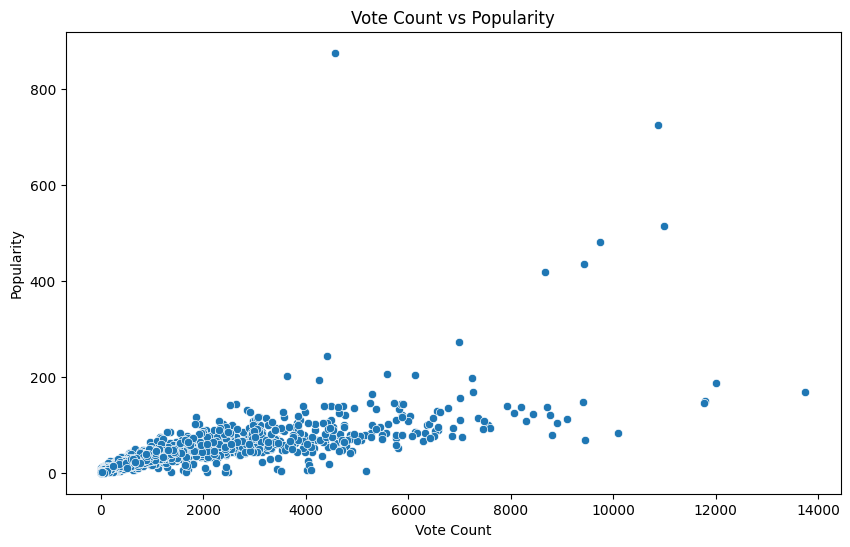

In [50]:
# Calculate the correlation matrix for the relevant columns including popularity
correlation_matrix = movie_cleaned_data[['vote_count', 'overview_length', 'popularity']].corr()

# Display the correlation matrix as a table
display(correlation_matrix)
# Assuming 'df' is your DataFrame containing the movie data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='popularity', data=movie_cleaned_data)
plt.title('Vote Count vs Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.show()


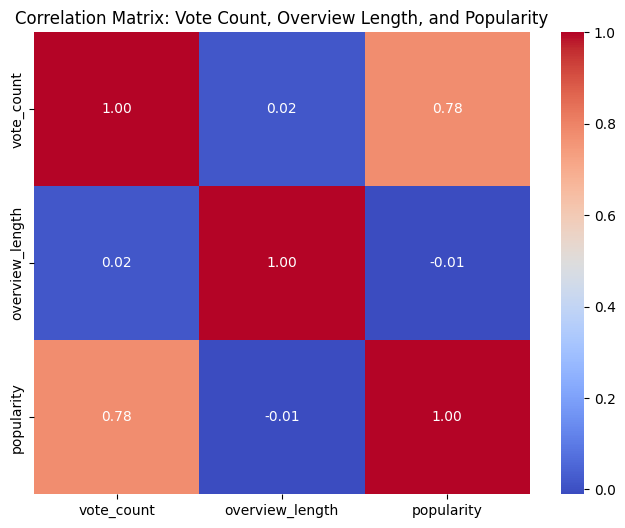

In [49]:
# Use .loc to avoid SettingWithCopyWarning and safely assign a new column for overview_length
movie_cleaned_data.loc[:, 'overview_length'] = movie_cleaned_data['overview'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

# Calculate the correlation matrix for the relevant columns including popularity
correlation_matrix = movie_cleaned_data[['vote_count', 'overview_length', 'popularity']].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Vote Count, Overview Length, and Popularity')
plt.show()


#### Answer to research question:
- Vote Count and Popularity: The vote count and popularity are strongly positively correlated (correlation coefficient of 0.78). This suggests that movies with more votes are typically more popular. This makes sense as a higher number of votes generally indicates a broader audience engagement and interest, which directly impacts the movie's overall popularity.

- Vote Count and Overview Length: There is a very weak correlation (0.016) between vote count and overview length. This indicates that the length of the movie’s overview has minimal influence on how many people vote for the movie. A longer or shorter overview does not significantly affect the number of votes a movie receives.

- Popularity and Overview Length: The correlation between popularity and overview length is also negligibly weak (-0.01), indicating that the length of the movie's description does not influence its popularity. Whether a movie has a long or short overview does not appear to affect its general reception or success.

- Conclusion: Vote count is strongly associated with popularity, meaning that a higher vote count tends to indicate greater popularity. Overview length does not have a significant impact on vote count or popularity. This suggests that other factors, such as marketing, genre, star power, or audience reviews, play a more significant role in determining a movie's success and engagement with audiences.

#### Research question: 
Does the release date of a movie (release_date) have an impact on the number of votes or the quality of the overview, and are there seasonal patterns in audience engagement?

In [55]:
# Convert release_date to datetime and handle potential missing values in-place
movie_cleaned_data.loc[:, 'release_date'] = pd.to_datetime(movie_cleaned_data['release_date'], errors='coerce')

# Extract month and season in a similar manner
movie_cleaned_data.loc[:, 'month'] = movie_cleaned_data['release_date'].dt.month
movie_cleaned_data.loc[:, 'season'] = movie_cleaned_data['release_date'].dt.month % 12 // 3 + 1  # 1: Spring, 2: Summer, 3: Fall, 4: Winter


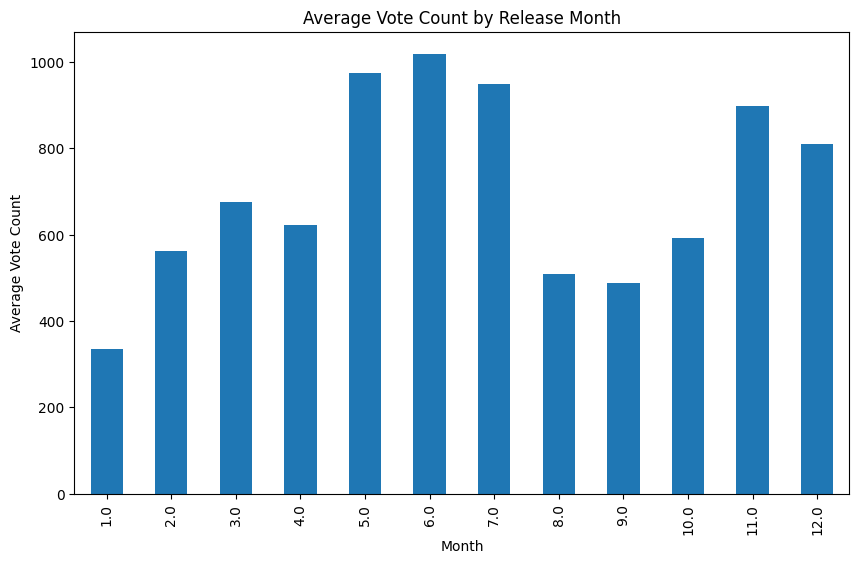

In [56]:
# Plot average vote count by release month
plt.figure(figsize=(10, 6))
movie_cleaned_data.groupby('month')['vote_count'].mean().plot(kind='bar')
plt.title('Average Vote Count by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Vote Count')
plt.show()

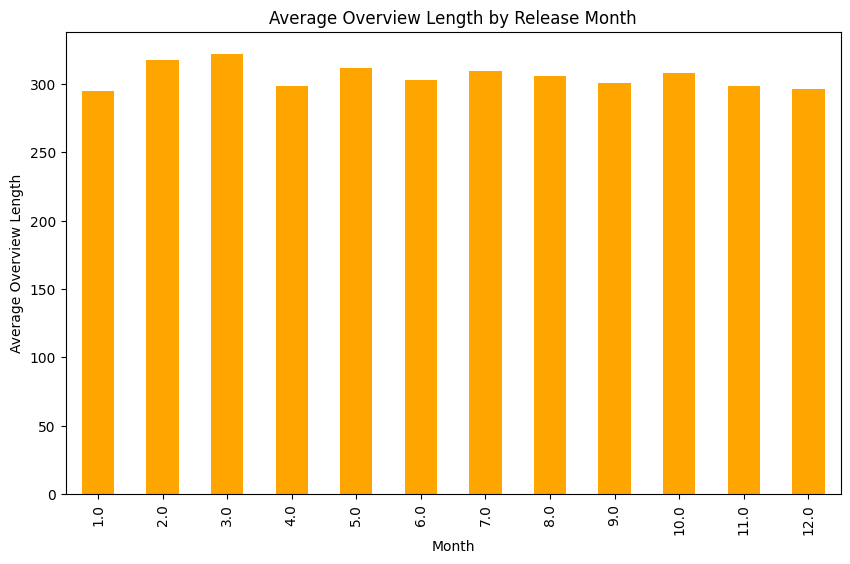

In [57]:
# Plot average overview length by release month
plt.figure(figsize=(10, 6))
movie_cleaned_data.groupby('month')['overview_length'].mean().plot(kind='bar', color='orange')
plt.title('Average Overview Length by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Overview Length')
plt.show()

In [58]:
# Calculate the average vote count and overview length by month
summary_table = movie_cleaned_data.groupby('month').agg({
    'vote_count': 'mean',
    'overview_length': 'mean'
}).rename(columns={
    'vote_count': 'Average Vote Count',
    'overview_length': 'Average Overview Length'
})

# Display the table
display(summary_table)


,Average Vote Count,Average Overview Length
month,,
1.0,336.335079,294.612565
2.0,562.233129,317.696319
3.0,676.731183,322.137097
4.0,623.054286,298.702857
5.0,973.567493,311.504132
6.0,1018.634961,302.956298
7.0,949.895317,309.429752
8.0,507.852300,305.685230
9.0,488.433673,300.630952


#### Answer to research question:
1. Impact of Release Date on Number of Votes:
- The data indicates that movies released in certain months, particularly in May, June, and July, tend to receive significantly higher average vote counts. June has the highest average, with around 1018 votes.
- In contrast, January and September show lower engagement, with January averaging around 336 votes.
- This suggests that release timing in the late spring to early summer may indeed positively impact audience engagement, likely due to increased leisure time and peak cinema season.
2. Impact of Release Date on Quality of the Overview:
- Overview length (used as a proxy for overview quality) remains relatively stable across different months, with averages ranging from 294 to 322 words.
- Minor variations appear, with slightly higher averages in March and February and lower in January and December. However, these differences are minimal, indicating that the release date does not strongly influence the quality or length of the movie overview.
3. Seasonal Patterns in Audience Engagement:
- There is a clear seasonal pattern in vote counts, with higher engagement during summer months (May to July) and some resurgence in November.
- Winter months, like January, exhibit lower vote counts, showing a dip in audience engagement likely due to seasonal preferences and reduced leisure time.
##### Summary:
The release date has a noticeable impact on audience engagement (vote counts), with summer releases tending to attract more votes. However, it has minimal impact on the quality or length of the movie overview. Seasonal patterns are evident, with audience engagement peaking in summer and dipping in winter, aligning with common seasonal viewing trends.

### **5.2:** Reflection

If I had more time to complete the project, I would explore the correlation between movie genre, budget, and release timing to better understand how these factors interact with audience engagement. Additionally, I would investigate whether movies with higher marketing budgets or popular cast members tend to perform better in specific seasons. Further research questions could include: "Do movies with specific genres (e.g., action, comedy) have higher engagement in particular seasons?" or "How does the release of sequels or franchise films impact vote counts compared to original movies?" These insights could provide a more nuanced understanding of what drives movie success.